In [11]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sbcbinaryformat import Streamer, Writer

ana_path = "../LAr10Ana/"
sys.path.insert(0, ana_path)

from GetEvent import GetEvent

%matplotlib inline

In [12]:
run = "/exp/e961/data/SBC-25-daqdata/20251117_11.tar"
event = 0
data = GetEvent(run, event, "scintillation", "run_info", "event_info", strictMode=False, lazy_load_scintillation=False)
scint = data["scintillation"]
scint.keys()

dict_keys(['loaded', 'EventCounter', 'TriggerSource', 'GroupMask', 'TriggerMask', 'AcquisitionMask', 'TriggerTimeTag', 'Waveforms', 'length'])

In [10]:
print(data["run_info"])

{'loaded': True, 'run_id': array(['20251117_11'], dtype='<U100'), 'run_exit_code': array([0], dtype=uint16), 'num_events': array([1], dtype=uint32), 'run_livetime': array([87571], dtype=uint64), 'comment': array(['CAEN gate enabled - 0.5ms later'], dtype='<U31'), 'run_start_time': array([1.76339959e+09]), 'run_end_time': array([1.76339974e+09]), 'active_modules': array(['cam1, cam2, cam3, amp1, amp2, amp3, acous, sql, plc, caen'],
      dtype='<U100'), 'pset_mode': array(['Random'], dtype='<U100'), 'pset_lo': array([nan], dtype=float32), 'pset_hi': array([nan], dtype=float32), 'source1_ID': array(['Bg'], dtype='<U100'), 'source1_location': array(['None'], dtype='<U100'), 'rc_ver': array(['v0.4.6-1-g1010549'], dtype='<U100'), 'red_caen_ver': array(['0.0.9'], dtype='<U100'), 'niusb_ver': array(['0.1.2'], dtype='<U100'), 'sbc_binary_ver': array(['0.5.1'], dtype='<U100')}


Text(0.5, 1.0, 'Gate starts 5ms after LED off')

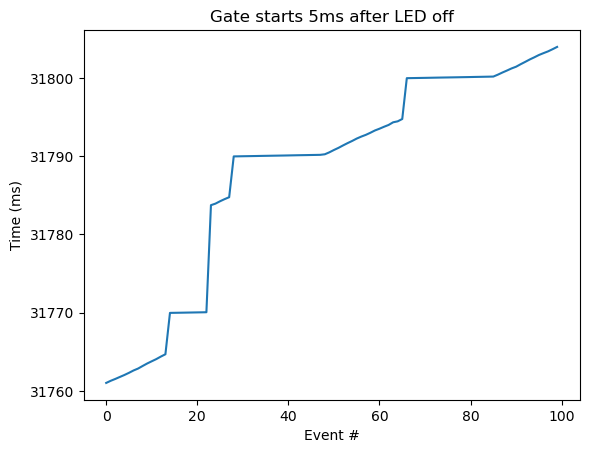

In [15]:
start = 13000
length = 100
time = scint["TriggerTimeTag"]*8e-6
plt.plot(time[start:start+length])
plt.xlabel("Event #")
plt.ylabel("Time (ms)")
plt.title("Gate starts 5ms after LED off")

In [4]:
print(time[start:start+length]-31672)
print(scint["EventCounter"][start:start+length])

[ 0.041176  0.269272  0.503384  0.768216  1.023384  1.335064  1.567576
  1.869336  2.19868   2.424024  2.654552  2.896792  5.140056  5.150424
  5.160344  5.1702    5.179992  5.19004   5.199832  5.265752  5.563864
  5.869912  6.144024 17.623512 17.896792 18.196888 18.476504 18.728216
 18.992536 19.24668  19.519896 19.87388  20.102168 20.337304 20.54012
 20.78748  21.029656 21.310808 21.617688 21.896472 22.284696 22.558616
 22.835032 25.136216 25.146072 25.156824 25.166616 25.176472 25.186328
 25.19644  25.206104 25.21596  25.381336 25.632024 25.882776 26.160792
 26.410072 26.760856 27.053784 27.330072 27.617432 27.909592 28.183448
 28.435032 28.6694   28.999832 29.250776 29.499928 29.718872 30.00508
 30.254232 30.480984 30.711512 30.95356  31.273048 31.541464 31.772504
 32.067416 32.298328 32.570136 32.893848 35.134936 35.144664 35.154456
 35.16444  35.17468  35.184856 35.194712 35.204568 35.374936 35.626712
 35.856472 36.061848 36.290264 36.546648 36.823064 37.078488 37.328152
 37.575 

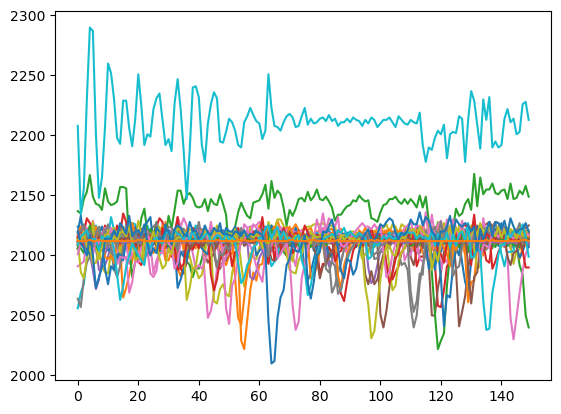

In [57]:
index = 300000
for ch in range(32):
    plt.plot(scint["Waveforms"][index,ch])